<a href="https://colab.research.google.com/github/arthuravilez/mackenzie/blob/master/basketball_da_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trilha 2: Tarefa (Peso 3)
A prática de scraping é uma forma de coleta de dados. Web Scraping é a coleta em páginas web. Nesta atividade, vamos testar a técnica utilizando a Biblioteca Beautifulsoap rodando em um notebook Python. Leia o artigo sobre Web Scraping:

BUENO, L. F. Como fazer web scraping em Python. Data Hackers, mar. 2019. Disponível em: https://medium.com/data-hackers/como-fazer-web-scraping-em-python-23c9d465a37f Acesso em: 6 out. 2021.
Utilize o Google Colaboratory <https://colab.research.google.com/notebooks/intro.ipynb> para criar o notebook. Ou, se preferir, um programa em python (arquivo.py).

E implemente o tutorial disponível no artigo para coletar dados sobre basketball da NBA.

Modifique a apresentação dos resultados utilizando um gráfico de linhas.
Amplie a pesquisa para incluir dados até o ano de 2020.
 _______

* Encaminhe o arquivo notebook (.ipynb) ou python (.py) criado na tarefa.* 

**Esta atividade vale 10 pontos e tem peso 3.** 

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
req = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_totals.html')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


In [3]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [4]:
table_str = str(table)

df = pd.read_html(table_str)[0]

In [5]:
table = soup.find(name='table', attrs={'id':'confs_standings_W'})

In [6]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


In [7]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [8]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [9]:
print(df.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')


In [10]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [11]:
print(df.dtypes)

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
eFG%      float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
Year        int64
dtype: object


In [12]:
dados = df[['Year', '3PA']].groupby('Year').sum()
print(dados.head(10))

        3PA
Year       
2013  41437
2014  46072
2015  50694
2016  49264
2017  56534
2018  63854
2019  75583
2020  62635


In [13]:
display(dados)

,3PA
Year,
2013,41437
2014,46072
2015,50694
2016,49264
2017,56534
2018,63854
2019,75583
2020,62635


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

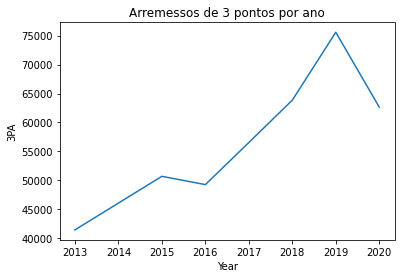

In [21]:
graf_linha = sns.lineplot(data = dados, x='Year', y='3PA')
plt.title('Arremessos de 3 pontos por ano')
plt.show(graf_linha)